# Statistical Methods for Outlier Detection Tutorial

Outlier detection is a crucial step in data preprocessing to ensure accurate statistical analysis and optimal performance of machine learning models. In this guide, we will explore several statistical methods for detecting outliers using Python, including the Z-score, Modified Z-score, IQR (Interquartile Range) method, Grubbs' Test, and visual methods like box plots.

## 1. Import Required Libraries

Let's start by importing the necessary libraries. We’ll use pandas for data manipulation, numpy for numerical operations, and matplotlib and seaborn for visualization:

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 2. Load Your Data

Load your dataset into a DataFrame. Replace 'your_data.csv' with the path to your actual data file.

In [124]:
data_url = 'https://raw.githubusercontent.com/tribasuki74/AppliedDataEngineering/refs/heads/main/Code/dataset/Clean_data.csv'
df = pd.read_csv(data_url)

display(df.head())
print()

print(df.dtypes)
print()

print(df.shape)
print()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,215000.0
1,2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,105000.0
2,3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,172000.0
3,4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,244000.0
4,5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,189900.0



Order              float64
PID                float64
MS SubClass        float64
Lot Frontage       float64
Lot Area           float64
Overall Qual       float64
Overall Cond       float64
Year Built         float64
Year Remod/Add     float64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF         float64
2nd Flr SF         float64
Low Qual Fin SF    float64
Gr Liv Area        float64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath          float64
Half Bath          float64
Bedroom AbvGr      float64
Kitchen AbvGr      float64
TotRms AbvGrd      float64
Fireplaces         float64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF       float64
Open Porch SF      float64
Enclosed Porch     float64
3Ssn Porch         float64
Screen Porch       float64
Pool Area          float64
Misc Val           float64
Mo Sold            float64


## 3. Z-Score Method

The Z-score measures how many standard deviations an element is from the mean. A common threshold is to label all data points more than 3 standard deviations away from the mean as outliers.

In [125]:
newdf = df.copy()

zscoreDF = newdf[['Lot Frontage']]

z_scores = np.abs(stats.zscore(zscoreDF))

threshold = 3
outliers_z = (z_scores > threshold).any(axis=1)
df_outliers_z = zscoreDF[outliers_z]

print(f"Detected outliers using Z-score:\n{df_outliers_z}")


Detected outliers using Z-score:
      Lot Frontage
0            141.0
16           152.0
18           140.0
137          137.0
466          149.0
495          174.0
728          144.0
956          150.0
1265         313.0
1498         313.0
1592         150.0
1630         160.0
1638         195.0
1745         182.0
1760         160.0
2045         138.0
2118         155.0
2258         149.0
2278         200.0
2321         168.0
2570         174.0
2689         153.0
2889         140.0
2924         160.0


## 4. Modified Z-Score

The Modified Z-score is more robust for data with skewed distributions. It uses the median and MAD (median absolute deviation) instead of the mean and standard deviation.

In [138]:
def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

modified_z_scoreDF = newdf[['Lot Frontage']]
mod_z_scores = modified_z_score(modified_z_scoreDF)
threshold = 3.5
outliers_mod_z = np.abs(mod_z_scores) > threshold
df_outliers_mod_z = modified_z_scoreDF[outliers_mod_z]

print(f"Detected outliers using Modified Z-score:\n{df_outliers_mod_z[df_outliers_mod_z['Lot Frontage'].notna()]}")



Detected outliers using Modified Z-score:
      Lot Frontage
0            141.0
16           152.0
18           140.0
137          137.0
234          124.0
311          129.0
368          124.0
435          129.0
460          129.0
466          149.0
467          122.0
495          174.0
616          128.0
728          144.0
825          122.0
921          130.0
956          150.0
962          130.0
964          125.0
1013         123.4
1067         130.0
1071         135.0
1102         136.0
1265         313.0
1403         124.0
1497         123.0
1498         313.0
1592         150.0
1630         160.0
1638         195.0
1656         128.0
1702         134.0
1745         182.0
1760         160.0
1866         130.0
2045         138.0
2118         155.0
2180         128.0
2181         130.0
2212         126.0
2258         149.0
2278         200.0
2298         124.0
2316         134.0
2321         168.0
2378         129.0
2398         131.0
2570         174.0
2577         125.0
2617    

## Interquartile Range (IQR) Method

The IQR method is effective for identifying outliers in non-normal data distributions. Outliers are defined as observations outside the range of [Q1 - 1.5IQR, Q3 + 1.5IQR].

In [139]:
quantileDF = newdf[['Lot Frontage']]

Q1 = quantileDF.quantile(0.25)
Q3 = quantileDF.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (quantileDF < (Q1 - 1.5 * IQR)) | (quantileDF > (Q3 + 1.5 * IQR))
df_outliers_iqr = quantileDF[outliers_iqr.any(axis=1)]

print(f"Detected outliers using IQR:\n{df_outliers_iqr}")



Detected outliers using IQR:
      Lot Frontage
0            141.0
16           152.0
18           140.0
28            26.0
29            21.0
30            21.0
31            21.0
33            24.0
34            24.0
35            24.0
93            25.0
97            24.0
98            24.0
100           28.2
102           24.0
128          120.0
137          137.0
150          119.0
234          124.0
311          129.0
326           24.0
329           21.0
330           21.0
331           21.0
332           21.0
349           28.0
368          124.0
402           21.0
403           24.0
404           21.0
405           21.0
406           21.0
407           21.0
409           24.0
410           24.0
411           24.0
412           24.0
413           24.0
414           24.0
415           24.0
416           24.0
417           24.0
435          129.0
457          117.0
460          129.0
466          149.0
467          122.0
495          174.0
520          112.0
573           24.0
60

## 6. Grubbs' Test

Grubbs' Test is used to detect a single outlier in a dataset assumed to come from a normally distributed population. It's typically used iteratively to remove the most extreme values one at a time.

In [140]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value_1 = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value_1))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value_1)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("We can see from the Grubbs test that the calculated value is less than the crucial value")
        print("Recognize the null hypothesis and draw the conclusion that there are no outliers\n")
    else:
        print("We see from the Grubbs test that the estimated value exceeds the critical value.")
        print("Reject the null theory and draw the conclusion that there are outliers\n")

x = np.array(newdf['Lot Frontage'].tolist())

grubbs_test(x)



Grubbs Calculated Value: 10.958940493238723
Grubbs Critical Value: 4.293779244473721
We see from the Grubbs test that the estimated value exceeds the critical value.
Reject the null theory and draw the conclusion that there are outliers



## 7. Visualization Methods

### 7.1 Box Plot

Box plots visually summarize data distributions and highlight outliers with points beyond the whiskers.

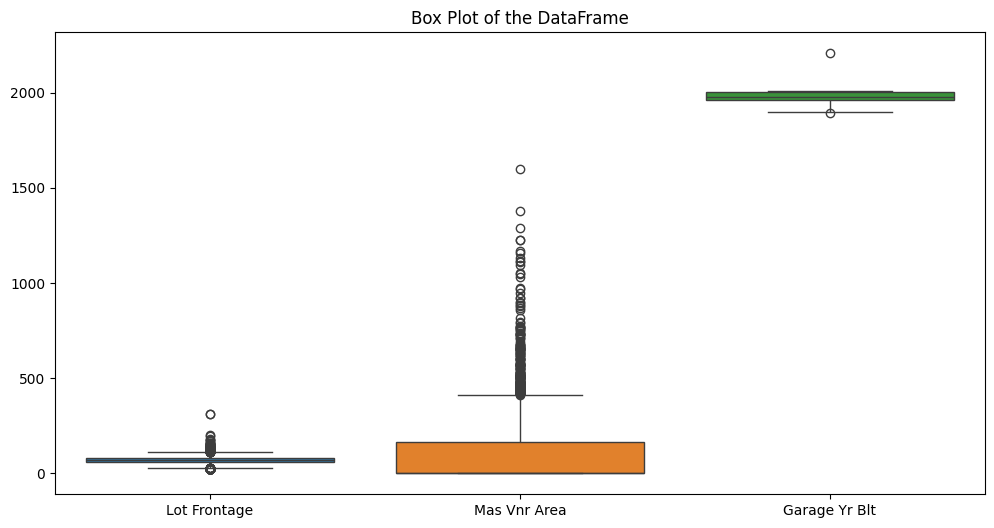

In [141]:
visualDF = newdf[['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=visualDF)
plt.title('Box Plot of the DataFrame')
plt.show()


### 7.2 Scatter Plot

Scatter plots are useful for bivariate outlier detection.

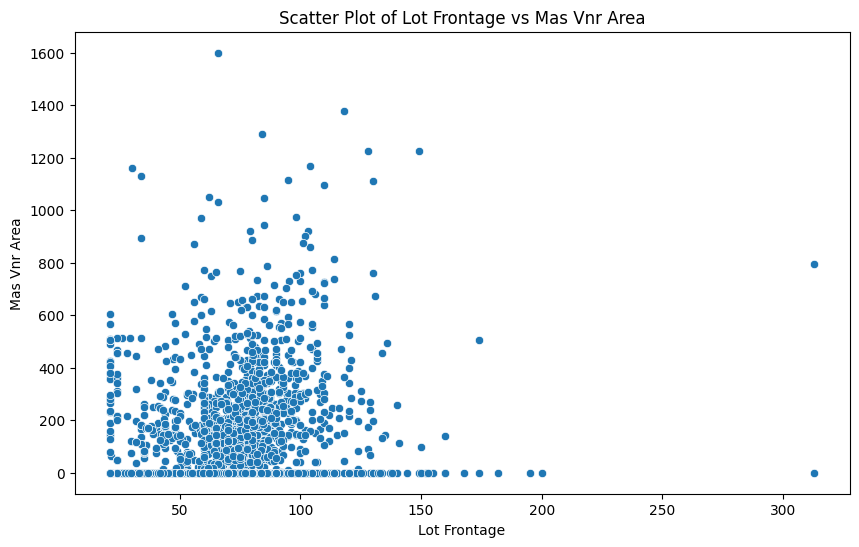

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lot Frontage', y='Mas Vnr Area', data=df)
plt.title('Scatter Plot of Lot Frontage vs Mas Vnr Area')
plt.show()


## Explanation

- Z-score and Modified Z-score: Best for data with (Z-score) or without (Modified Z-score) a normal distribution assumption.

- IQR: Effective for skewed distributions and does not assume normality.

- Grubbs' Test: Useful for datasets where only a single outlier is suspected in normally distributed data.

- Visual Methods: Provide intuitive insights into the data distribution and outlier existence.

# Machine Learning Approaches to Outlier Detection Tutorial


Machine learning approaches to outlier detection provide powerful tools to handle complex datasets with high dimensionality. Here, I'll guide you through three popular algorithms: Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM. We'll use Python and the scikit-learn library to demonstrate these techniques.

## 1. Import Required Libraries

We'll need pandas for handling data, numpy for numerical operations, and scikit-learn for the ML models:

In [143]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### 2. Load and Prepare Your Data

Load your dataset into a DataFrame, and perform any necessary preprocessing like scaling, which is particularly important for algorithms like LOF and One-Class SVM that are sensitive to the range of data.

In [144]:
# Load data
data_url = 'https://raw.githubusercontent.com/tribasuki74/AppliedDataEngineering/refs/heads/main/Code/dataset/Clean_data.csv'
df = pd.read_csv(data_url)

# Assume 'features' are all columns you want to use for detection
features = df[['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']]

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
display(features_scaled)
print()


array([[ 3.21492721,  0.05563053, -0.66332229],
       [ 0.46850389, -0.5710417 , -0.62433761],
       [ 0.51352722,  0.03324938, -0.74129164],
       ...,
       [-0.3419161 , -0.5710417 ,  0.54520271],
       [ 0.33343389, -0.5710417 , -0.07855213],
       [ 0.19836389, -0.04508465,  0.62317206]])

### 3. Isolation Forest


Isolation Forest is an algorithm that works on the principle of isolating anomalies instead of profiling normal data points.



In [145]:
# Initialize the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(features_scaled)

# Predictions
outliers_if = iso_forest.predict(features_scaled)
features['outlier_if'] = outliers_if

# Mark outliers in the dataset
features['outlier_if'] = features['outlier_if'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_if'].value_counts())
print()

display(features.loc[features['outlier_if'] == 'outlier'])
print()


outlier_if
normal     2900
outlier      30
Name: count, dtype: int64



,Lot Frontage,Mas Vnr Area,Garage Yr Blt,outlier_if
46,110.0,1095.0,2003.0,outlier
101,30.2,1159.0,2000.0,outlier
169,60.0,771.0,1900.0,outlier
422,104.0,860.0,2009.0,outlier
447,103.0,922.0,2003.0,outlier
495,174.0,506.0,1995.0,outlier
498,98.0,975.0,1998.0,outlier
570,34.0,894.0,1999.0,outlier
806,120.0,0.0,1900.0,outlier
1044,21.0,604.0,1971.0,outlier


### 4. Local Outlier Factor (LOF)

LOF measures the local deviation of density of a given data point with respect to its neighbors. It is good for detecting anomalies in a dataset that may not be extreme but are abnormal in their local context.


In [146]:
# Initialize the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

# Predictions
outliers_lof = lof.fit_predict(features_scaled)
features['outlier_lof'] = outliers_lof

# Mark outliers in the dataset
features['outlier_lof'] = features['outlier_lof'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_lof'].value_counts())
print()

display(features[['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt', 'outlier_lof']].loc[features['outlier_lof'] == 'outlier'])
print()


outlier_lof
normal     2871
outlier      59
Name: count, dtype: int64



,Lot Frontage,Mas Vnr Area,Garage Yr Blt,outlier_lof
69,75.0,36.0,2008.0,outlier
101,30.2,1159.0,2000.0,outlier
104,57.0,0.0,2010.0,outlier
169,60.0,771.0,1900.0,outlier
243,60.0,0.0,1946.0,outlier
250,64.0,24.0,2006.0,outlier
287,45.0,0.0,1938.0,outlier
301,40.0,0.0,1922.0,outlier
327,31.0,0.0,1973.0,outlier
485,67.8,40.0,2000.0,outlier


### 5. One-Class SVM

One-Class SVM is used for novelty detection where you train the model only on the normal data. It learns the boundaries of these points and classifies any point lying outside the boundary as an outlier.

In [147]:
# Initialize the model
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)

# Fit the model
oc_svm.fit(features_scaled)

# Predictions
outliers_svm = oc_svm.predict(features_scaled)
features['outlier_svm'] = outliers_svm

# Mark outliers in the dataset
features['outlier_svm'] = features['outlier_svm'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_svm'].value_counts())
print()

display(features[['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt', 'outlier_svm']].loc[features['outlier_svm'] == 'outlier'])
print()


outlier_svm
normal     2870
outlier      60
Name: count, dtype: int64



,Lot Frontage,Mas Vnr Area,Garage Yr Blt,outlier_svm
18,140.0,0.0,1951.0,outlier
30,21.0,492.0,1997.0,outlier
38,83.0,450.0,2010.0,outlier
98,24.0,216.0,2005.0,outlier
99,47.2,432.0,2009.0,outlier
101,30.2,1159.0,2000.0,outlier
128,120.0,340.0,1949.0,outlier
156,74.0,0.0,1956.0,outlier
169,60.0,771.0,1900.0,outlier
186,100.0,0.0,1949.6,outlier


## Explanation and Use Cases:

- Min-Max Scaling: Good for cases when you need values in a bounded interval. Susceptible to outliers as they can compress the majority of the data into a narrow range.

- Z-Score Normalization: Suitable for data with properties of a normal distribution. This method standardizes the features so that they are centered around 0 with a standard deviation of 1.

- Robust Scaling: Best for datasets with outliers. This method uses more robust estimates for the center and range of your data.

- Unit Vector Scaling: Useful for text data or when using algorithms that rely on the cosine of angle between vectors.